In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

### Relatiivne viga

\begin{equation*}
    \text{"relatiivne viga"} = \frac{ v_{saadud} - v_{oodatud} }{ v_{oodatud} } = \frac{ v_{saadud} }{ v_{oodatud} } - 1
\end{equation*}

Olgu $A$ ja $B$ mudelid ning nende ennustused märgendi $y_i$ puhul vastavalt $\hat{y}_i$ ja $\hat{z}_i$

$\dots$

\begin{align*}
    \Delta & := p_A - p_B \\
           & = \frac{ 1 }{ n } \sum_{ i = 1 }^{ n } [\hat{y}_i = y_i] - \frac{ 1 }{ n } \sum_{ i = 1 }^{ n } [\hat{z}_i = y_i] \\
           & = \frac{ 1 }{ n } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
           & = \frac{ k }{ n } \frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
\end{align*}

millest $\frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] =: \delta$

### Höffding

Olgu $-1 \leq X_i \leq 1$ ja $S_n = \sum_{i=1}^{n} X_i$

\begin{equation*}
    P ( \mid \delta - \Delta \mid \geq \frac{c}{k} ) \leq 2 \exp{ \left( - \frac{ c^2 }{ 2 k } \right) }
\end{equation*}

$\alpha \in [0, 1]$, siis Höffdingi võrratusest

\begin{equation*}
     \varepsilon := \frac{c}{k} = \sqrt{ - \frac{2}{k} \ln{ \left( \frac{ 1 - \alpha }{2} \right) } }
\end{equation*}

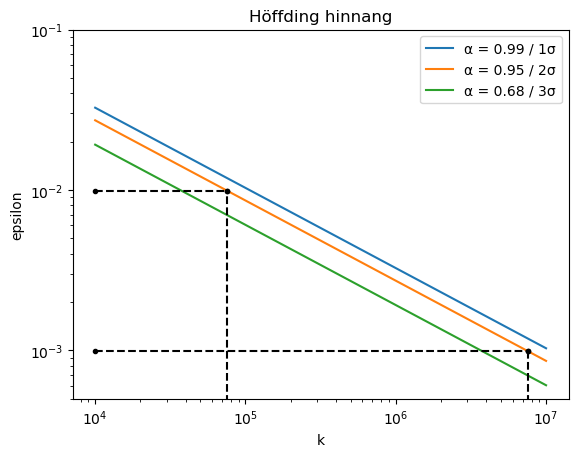

In [2]:
k = np.logspace(4, 7, num=100)
alpha = np.array([0.99, 0.95, 0.68])

epsilon_höffding = []
for a in alpha:
    ln = np.log((1 - a) / 2)
    epsilon = np.sqrt(ln * (-2 / k))
    
    epsilon_höffding.append(epsilon)
    
epsilon_höffding = np.array(epsilon_höffding)

for e in epsilon_höffding:
    plt.plot(k, e)
    
for e in [0.01, 0.001]:
    i = np.argmin(np.abs(epsilon_höffding[1] - e))
    plt.plot([k[0], k[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
    plt.plot([k[i], k[i]], [0, epsilon_höffding[1][i]], '.k--')

plt.title('Höffding hinnang')

plt.legend([f'α = {a} / {i + 1}σ' for i, a in enumerate(alpha)])

plt.xlabel('k')
plt.xscale('log')
plt.xticks(np.logspace(4, 7, num=4))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabel/dataframe

### Binoom

Kuna $X_i \in \{ -1 , 1 \}$ defineerime sellise $Y_i \in \{ 0 , 1 \}$ järgnevalt $Y_i = \frac{ X_i + 1 }{ 2 }$, siis $\sum_{i = 1}^{k} Y_i \sim Bin(k, p)$, kus

\begin{equation*}
    p = \frac{ 1 }{ k } \sum_{i = 1}^{k} Y_i
\end{equation*}

Kuidas on $p$ seotud $p_A$ ja $p_B$?

\begin{align*}
    \delta & = \frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
           & = \frac{ 1 }{ k } \sum_{i = 1}^{ k } X_i \\
           & = \frac{ 1 }{ k } ( 2 \sum_{i = 1}^{ k } Y_i - k )  \\
           & = 2 \frac{ \sum_{i = 1}^{ k } Y_i }{ k } - 1 \\
           & = 2 p - 1
\end{align*}

Millest järeldub, et $p = \frac{ 1 }{ 2 } + \frac{ k }{ n } \frac{ p_A - p_B }{ 2 }$

$\dots$

Valim suurusega $\ell$ ning valimi põhine hinnang

\begin{align*}
    \hat{s} :&= \frac{ 1 }{ \ell } \sum_{ i = 1 }^{ \ell } X_i \\
             &= \frac{ 2 }{ \ell } \sum_{ i = 1 }^{ \ell } Y_i - 1 \\
\end{align*}

Kuna $Y_i$-de summa on binoomjaotusega ja $\frac{ ( \hat{s} + 1 ) \ell }{ 2 } = \sum_{ i = 1 }^{ \ell } Y_i$ kehtib

\begin{equation*}
    \frac{ ( \hat{s} + 1 ) \ell }{ 2 } \sim Bin( \ell , p )
\end{equation*}

$\dots$

\begin{equation*}
    P ( \mid \frac{ \hat{ s } - \delta }{ \delta } \mid \leq \varepsilon ) = 0.05 \text{,}
\end{equation*}

mis kehtib parajasti siis, kui

\begin{equation}
    P ( \frac{ (\hat{s} + 1) \ell }{ 2 } \leq \frac{ ( ( 1 - \varepsilon ) \delta + 1 ) \ell }{ 2 } ) = \frac{ 0.05 }{ 2 }
\end{equation}

Kuna tõenäosuse aluses võrratuse paremal pool on jaotuse $2.5\%$ protsendipunkt $q$ saab avaldada

\begin{equation*}
    \varepsilon = 1 + \frac{ 1 }{ \delta } - \frac{ 2 q }{ \ell \delta }
\end{equation*}

0.01
9326.0334688322
72208.09018385471
0.001
890215.0854450393
7564633.275546291


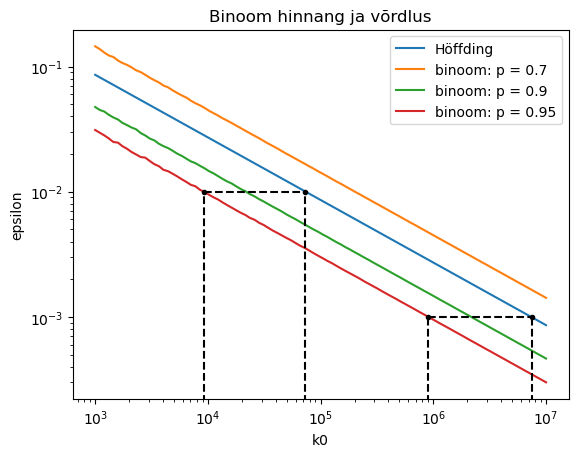

In [5]:
ell = np.logspace(3, 7, num=100)
tõenäosused = np.array([0.7, 0.9, 0.95])

epsilon_höffding = np.sqrt(- np.log((1 - 0.95) / 2) * (2 / ell))
epsilon_binoom = []
for p in tõenäosused:
    delta = 2 * p - 1
    q = binom.ppf(q=0.025, p=p, n=ell)
    epsilon = 1 + 1 / delta - (2 * q) / (ell * delta)
    
    epsilon_binoom.append(epsilon)

epsilon_binoom = np.array(epsilon_binoom)

plt.plot(ell, epsilon_höffding)
for e in epsilon_binoom:
    plt.plot(ell, e)

for e in [0.01, 0.001]:
    i_binoom = np.argmin(np.abs(epsilon_binoom[-1] - e))
    i_höffding = np.argmin(np.abs(epsilon_höffding - e))

    plt.plot([ell[i_binoom], ell[i_höffding]], [epsilon_binoom[-1][i_binoom], epsilon_binoom[-1][i_binoom]], '.k--')
    plt.plot([ell[i_binoom], ell[i_binoom]], [0, epsilon_binoom[-1][i_binoom]], 'k--')
    plt.plot([ell[i_höffding], ell[i_höffding]], [0, epsilon_binoom[-1][i_binoom]], 'k--')
    
    print(e)
    print(ell[i_binoom])
    print(ell[i_höffding])


plt.title('Binoom hinnang ja võrdlus')

plt.legend(['Höffding'] + [f'binoom: p = {p}' for p in tõenäosused])

plt.xlabel('k0')
plt.xscale('log')
plt.xticks(np.logspace(3, 7, num=5))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabel/dataframe

## Empiiriline test

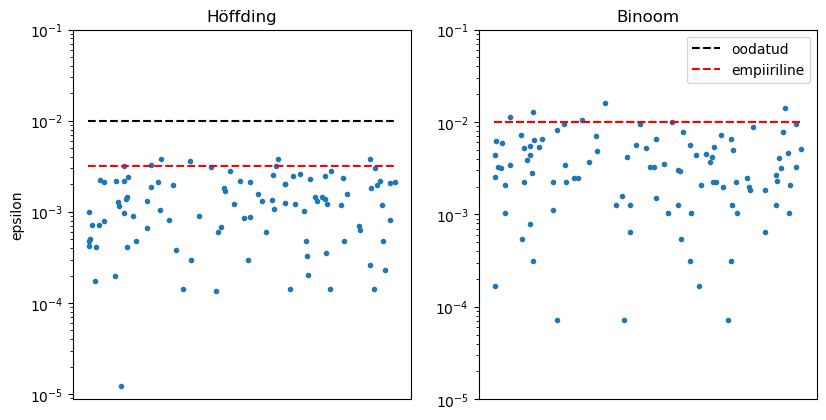

In [13]:
size = 100
i = int(size * 0.95) - 1
x = np.random.uniform(size=size)
p = 0.95
delta = 2 * p - 1 

plt.figure(figsize=[6.4 * 1.5, 4.8])

# höffding hinnang
plt.subplot(1, 2, 1)

# todo hinnang on p-st sõltumatu
s_hat_höffding = 2 * binom.rvs(p=p, n=72208, size=size) / 72208 - 1
jaotus_höffding = np.abs((s_hat_höffding - delta) / delta)  
höffding_q95 = np.partition(jaotus_höffding, i)[i]

plt.plot([0, 1], [0.01, 0.01], 'k--')
plt.plot([0, 1], [höffding_q95, höffding_q95], 'r--')
plt.scatter(x, jaotus_höffding, marker='.')

plt.title('Höffding')
# plt.legend(['oodatud', 'empiiriline'])

plt.xticks([])

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-5, -1, num=5))

# binoom hinnang
plt.subplot(1, 2, 2)

s_hat_binoom = 2 * binom.rvs(p=p, n=9326, size=size) / 9326 - 1
jaotus_binoom = np.abs((s_hat_binoom - delta) / delta)
binoom_q95 = np.partition(jaotus_binoom, i)[i]

plt.plot([0, 1], [0.01, 0.01], 'k--')
plt.plot([0, 1], [binoom_q95, binoom_q95], 'r--')
plt.scatter(x, jaotus_binoom, marker='.')

plt.title('Binoom')
plt.legend(['oodatud', 'empiiriline'])

plt.xticks([])

plt.yscale('log')
plt.yticks(np.logspace(-5, -1, num=5))

plt.show()